In [29]:
# PART 1 a 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import re
from collections import Counter
from wordcloud import WordCloud

# Read the CSV file
df = pd.read_csv('monitoringdata.csv')

# Display first few rows
print("First 5 rows:")
print(df.head())

# Display basic information about the data structure
print("\nData structure info:")
print(df.info())

# Display column names and data types
print("\nColumn names and data types:")
print(df.dtypes)

# Display shape of the dataframe
print(f"\nShape of the dataframe: {df.shape}")

First 5 rows:
  baby_id  name  gender  gestational_age_weeks  birth_weight_kg  \
0    B001  Sara  Female                   40.2              3.3   
1    B001  Sara  Female                   40.2              3.3   
2    B001  Sara  Female                   40.2              3.3   
3    B001  Sara  Female                   40.2              3.3   
4    B001  Sara  Female                   40.2              3.3   

   birth_length_cm  birth_head_circumference_cm        date  age_days  \
0             50.0                         31.9  2024-12-10         1   
1             50.0                         31.9  2024-12-11         2   
2             50.0                         31.9  2024-12-12         3   
3             50.0                         31.9  2024-12-13         4   
4             50.0                         31.9  2024-12-14         5   

   weight_kg  ...  oxygen_saturation   feeding_type  \
0       3.28  ...                 98        Formula   
1       3.35  ...                 

In [7]:
#PART 1 b
# Check dimensions
print(f"DataFrame dimensions: {df.shape}")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

# Identify data types of each column
df.info()

# Check for missing values in important columns

print("Overall missing values summary:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

# Generate basic statistics for numerical columns
print("Basic statistics for numerical columns:")
numerical_stats = df.describe()
print(numerical_stats)


DataFrame dimensions: (3000, 25)
Rows: 3000
Columns: 25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   baby_id                      3000 non-null   object 
 1   name                         3000 non-null   object 
 2   gender                       3000 non-null   object 
 3   gestational_age_weeks        3000 non-null   float64
 4   birth_weight_kg              3000 non-null   float64
 5   birth_length_cm              3000 non-null   float64
 6   birth_head_circumference_cm  3000 non-null   float64
 7   date                         3000 non-null   object 
 8   age_days                     3000 non-null   int64  
 9   weight_kg                    3000 non-null   float64
 10  length_cm                    3000 non-null   float64
 11  head_circumference_cm        3000 non-null   float64
 12  temperature_c       

In [11]:
# Part 2 a
# Identify columns with many missing values
print("Missing values per column:")
missing_summary = df.isnull().sum()
print(missing_summary)

print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Handle missing values by removal
# Check initial dimensions
print(f"Initial shape: {df.shape}")
print(f"Initial missing values: {df.isnull().sum().sum()}")

# Remove rows with ANY missing values
df_cleaned = df.dropna()
print(f"\nAfter removing rows with ANY missing values:")
print(f"New shape: {df_cleaned.shape}")
print(f"Rows removed: {len(df) - len(df_cleaned)}")
print(f"Percentage of data kept: {len(df_cleaned)/len(df)*100:.2f}%")
print(f"Remaining missing values: {df_cleaned.isnull().sum().sum()}")

# Create a cleaned version of the dataset
from datetime import datetime

# Display original dataset information
print("ORIGINAL DATASET")
print("=" * 40)
print(f"Original shape: {df.shape}")
print(f"Total rows: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"Total missing values: {df.isnull().sum().sum():,}")
print(f"Percentage of missing data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

# Save the cleaned dataset
cleaned_filename = "monitoringdata_cleaned_complete.csv"
df_cleaned.to_csv(cleaned_filename, index=False)

print(f"\n✅ SUCCESSFULLY SAVED CLEANED DATASET")
print(f"📁 Cleaned data saved as: {cleaned_filename}")

# Display final validation
print(f"\nFINAL VALIDATION:")
print("=" * 40)
print(f"✓ No missing values: {df_cleaned.isnull().sum().sum() == 0}")
print(f"✓ Shape: {df_cleaned.shape}")
print(f"✓ Columns preserved: {len(df_cleaned.columns)}/{len(df.columns)}")
print(f"✓ Data completeness: 100%")

# Show sample of the cleaned data
print(f"\nSAMPLE OF CLEANED DATA (first 3 rows):")
print("=" * 40)
print(df_cleaned.head(3))


Missing values per column:
baby_id                           0
name                              0
gender                            0
gestational_age_weeks             0
birth_weight_kg                   0
birth_length_cm                   0
birth_head_circumference_cm       0
date                              0
age_days                          0
weight_kg                         0
length_cm                         0
head_circumference_cm             0
temperature_c                     0
heart_rate_bpm                    0
respiratory_rate_bpm              0
oxygen_saturation                 0
feeding_type                      0
feeding_frequency_per_day         0
urine_output_count                0
stool_count                       0
jaundice_level_mg_dl              0
apgar_score                    2900
immunizations_done                0
reflexes_normal                   0
risk_level                        0
dtype: int64

Total missing values: 2900
Initial shape: (3000, 25)
Initia

In [ ]:
# PART 2 b
# Convert date columns to datetime format
date_columns = ['date'] 

print("Converting date columns to datetime format...")
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"✅ Converted '{col}' to datetime format")
    else:
        print(f"⚠️  Column '{col}' not found in dataset")

# Save the converted dataset
df.to_csv('monitoringdata_datetime_converted.csv', index=False)
print("\n✅ Dataset saved as 'monitoringdata_datetime_converted.csv'")

# Show summary
print(f"\nFinal dataset shape: {df.shape}")
print("Date columns converted to datetime format.")

# Extract year from date for time-based analysis
# Specify your main date column
date_column = 'date'

# Convert to datetime and extract year
df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
df['year'] = df[date_column].dt.year

print(f"✅ Extracted year from '{date_column}'")
print(f"Year range: {df['year'].min()} to {df['year'].max()}")
print(f"Year distribution:\n{df['year'].value_counts().sort_index()}")

# Save the dataset
df.to_csv('monitoringdata_with_year.csv', index=False)
print("\n✅ Dataset saved as 'monitoringdata_with_year.csv'")


Converting date columns to datetime format...
✅ Converted 'date' to datetime format

✅ Dataset saved as 'monitoringdata_datetime_converted.csv'

Final dataset shape: (3000, 25)
Date columns converted to datetime format.
✅ Extracted year from 'date'
Year range: 2024 to 2025
Year distribution:
year
2024    1056
2025    1944
Name: count, dtype: int64

✅ Dataset saved as 'monitoringdata_with_year.csv'


In [26]:
# PART 3 a
# Identify the birth date column 
birth_date_column = 'date' 

# Convert to datetime
df[birth_date_column] = pd.to_datetime(df[birth_date_column], errors='coerce')

# Count babies by date
babies_by_date = df[birth_date_column].value_counts().sort_index()

print("Number of babies born by date:")
print("Date         Count")
print("-----------------")
for date, count in babies_by_date.head(10).items():  # Show first 10 dates
    print(f"{date.date()}:  {count}")

# Summary statistics
print(f"\n📊 SUMMARY STATISTICS")
print(f"Total babies: {len(df)}")
print(f"Date range: {df[birth_date_column].min().date()} to {df[birth_date_column].max().date()}")
print(f"Total unique birth dates: {len(babies_by_date)}")
print(f"Average babies per day: {len(df) / len(babies_by_date):.2f}")
print(f"Maximum babies in one day: {babies_by_date.max()} on {babies_by_date.idxmax().date()}")
print(f"Minimum babies in one day: {babies_by_date.min()}")

# Save the results
babies_by_date.to_csv('babies_by_date.csv', header=['count'])
print(f"\n💾 Results saved as 'babies_by_date.csv'")

# Monthly aggregation
df['birth_month'] = df[birth_date_column].dt.to_period('M')
babies_by_month = df['birth_month'].value_counts().sort_index()

print(f"\n📅 BABIES BY MONTH")
for month, count in babies_by_month.items():
    print(f"{month}: {count} babies")

# Weekly aggregation
df['birth_week'] = df[birth_date_column].dt.to_period('W')
babies_by_week = df['birth_week'].value_counts().sort_index()

print(f"\n📅 BABIES BY WEEK")
for week, count in babies_by_week.head(12).items():  # Show first 12 weeks
    print(f"Week {week}: {count} babies")

# Day of week analysis
df['day_of_week'] = df[birth_date_column].dt.day_name()
babies_by_weekday = df['day_of_week'].value_counts()

print(f"\n📅 BABIES BY DAY OF WEEK")
for day, count in babies_by_weekday.items():
    print(f"{day}: {count} babies")
    
    # Identify top gender for baby research
gender_column = 'gender'  

if gender_column not in df.columns:
    print(f"❌ Gender column '{gender_column}' not found in dataset.")
    print("Available columns:", df.columns.tolist())
else:
    print(f"✅ Using gender column: '{gender_column}'")
    
    # Clean gender data
    df[gender_column] = df[gender_column].astype(str).str.lower().str.strip()
    
    # Count gender distribution
    gender_counts = df[gender_column].value_counts()
    total_babies = len(df)
    
    print("GENDER DISTRIBUTION ANALYSIS")
    print("=" * 40)
    print(f"Total records: {total_babies}")
    print("\nGender Counts:")
    for gender, count in gender_counts.items():
        percentage = (count / total_babies) * 100
        print(f"{gender.upper()}: {count} ({percentage:.1f}%)")
    
    # Identify top gender
    top_gender = gender_counts.idxmax()
    top_count = gender_counts.max()
    top_percentage = (top_count / total_babies) * 100
    
    print(f"\n🏆 TOP GENDER: {top_gender.upper()}")
    print(f"   Count: {top_count}")
    print(f"   Percentage: {top_percentage:.1f}% of total")
    
    # Save results
    gender_counts.to_csv('gender_distribution.csv', header=['count'])
    print(f"\n💾 Results saved as 'gender_distribution.csv'")
    
    # Find most frequent words  (using simple word frequency)
# First, let's see what columns are available
print("AVAILABLE COLUMNS IN YOUR DATASET:")
print("=" * 40)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col} ({df[col].dtype})")

# Identify text columns by data type
text_columns = df.select_dtypes(include=['object', 'string']).columns.tolist()

print(f"\nTEXT COLUMNS FOUND: {text_columns}")

if not text_columns:
    print("No text columns found. Showing all columns for manual selection:")
    print(df.columns.tolist())
    # Let's try to find columns that might contain text by sampling
    potential_text_cols = []
    for col in df.columns:
        sample = df[col].dropna().head(5)
        if len(sample) > 0 and any(isinstance(x, str) and len(str(x)) > 20 for x in sample):
            potential_text_cols.append(col)
    
    if potential_text_cols:
        print(f"Potential text columns (based on content): {potential_text_cols}")
        text_columns = potential_text_cols
    else:
        print("No obvious text columns found. Please specify which columns to analyze.")
        # Exit or ask for manual input
        exit()

# Function to clean and tokenize text
def clean_text(text):
    if pd.isna(text):
        return []
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()
    # Remove common stopwords and short words
    stopwords = {'the', 'and', 'to', 'of', 'a', 'in', 'that', 'is', 'it', 'with', 'for', 'on', 'was', 'as', 'at', 'by', 'this', 'are', 'be', 'from', 'or', 'an', 'but', 'not', 'which', 'have', 'has', 'had', 'you', 'your', 'we', 'our', 'they', 'their', 'i', 'me', 'my', 'he', 'him', 'his', 'she', 'her', 'its'}
    words = [word for word in words if word not in stopwords and len(word) > 2]
    return words

print("\nANALYZING MOST FREQUENT WORDS")
print("=" * 50)

# Analyze each text column
for col in text_columns:
    print(f"\n📊 Analyzing column: '{col}'")
    
    # Check if column has text content
    non_empty = df[col].dropna()
    if len(non_empty) == 0:
        print(f"   No data in column '{col}'")
        continue
        
    # Get all text from the column
    all_text = ' '.join(non_empty.astype(str))
    
    # Clean and tokenize
    words = clean_text(all_text)
    total_words = len(words)
    unique_words = len(set(words))
    
    print(f"   Total words: {total_words:,}")
    print(f"   Unique words: {unique_words:,}")
    
    if total_words > 0:
        # Get most frequent words
        word_counts = Counter(words)
        top_words = word_counts.most_common(20)
        
        print(f"\n   Top 20 most frequent words in '{col}':")
        print("   Word".ljust(20), "Count".ljust(10), "Percentage")
        print("   " + "-" * 40)
        
        for word, count in top_words:
            percentage = (count / total_words) * 100
            print(f"   {word.ljust(20)} {str(count).ljust(10)} {percentage:.2f}%")
        
        # Save results
        word_df = pd.DataFrame(top_words, columns=['word', 'count'])
        word_df.to_csv(f'word_frequency_{col}.csv', index=False)
        print(f"   💾 Saved as 'word_frequency_{col}.csv'")
        
    else:
        print("   No meaningful words found in this column.")

Number of babies born by date:
Date         Count
-----------------
2024-08-23:  1
2024-08-24:  1
2024-08-25:  1
2024-08-26:  2
2024-08-27:  2
2024-08-28:  3
2024-08-29:  3
2024-08-30:  3
2024-08-31:  4
2024-09-01:  4

📊 SUMMARY STATISTICS
Total babies: 3000
Date range: 2024-08-23 to 2025-09-17
Total unique birth dates: 391
Average babies per day: 7.67
Maximum babies in one day: 12 on 2024-12-02
Minimum babies in one day: 1

💾 Results saved as 'babies_by_date.csv'

📅 BABIES BY MONTH
2024-08: 20 babies
2024-09: 245 babies
2024-10: 238 babies
2024-11: 232 babies
2024-12: 321 babies
2025-01: 235 babies
2025-02: 202 babies
2025-03: 341 babies
2025-04: 273 babies
2025-05: 174 babies
2025-06: 226 babies
2025-07: 210 babies
2025-08: 227 babies
2025-09: 56 babies

📅 BABIES BY WEEK
Week 2024-08-19/2024-08-25: 3 babies
Week 2024-08-26/2024-09-01: 21 babies
Week 2024-09-02/2024-09-08: 42 babies
Week 2024-09-09/2024-09-15: 53 babies
Week 2024-09-16/2024-09-22: 68 babies
Week 2024-09-23/2024-09-29:

✅ Found both birth_weight_kg and weight_kg columns
Original data: 3000 rows
Clean data: 3000 rows


C:\Users\Phiwokuhle\AppData\Local\Temp\ipykernel_11972\253391110.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(weight_data, labels=['Birth Weight', 'Current Weight'])


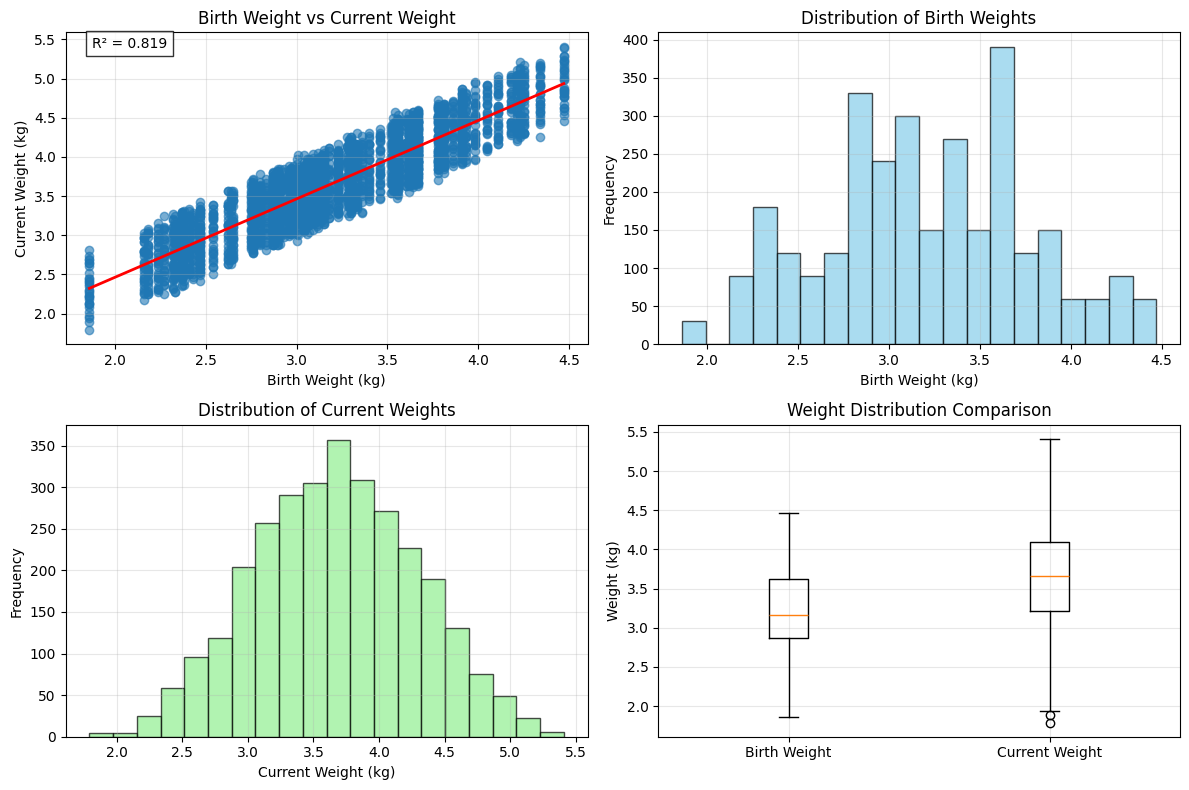


📊 STATISTICAL SUMMARY:
Birth Weight (kg):
  Mean: 3.205
  Std: 0.562
  Min: 1.860
  Max: 4.470

Current Weight (kg):
  Mean: 3.670
  Std: 0.621
  Min: 1.790
  Max: 5.410

Correlation: 0.905


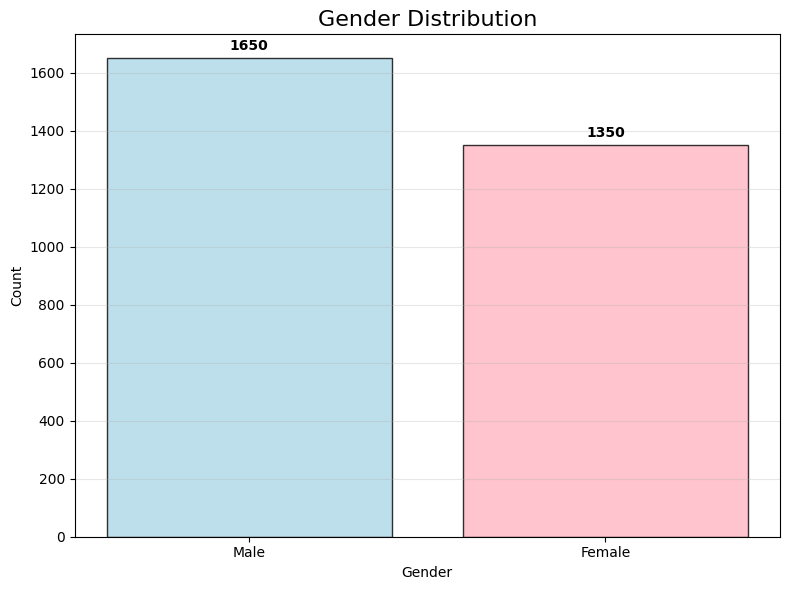

Gender counts:
Male: 1650
Female: 1350
✅ Using name column: 'name'
Found 3000 names


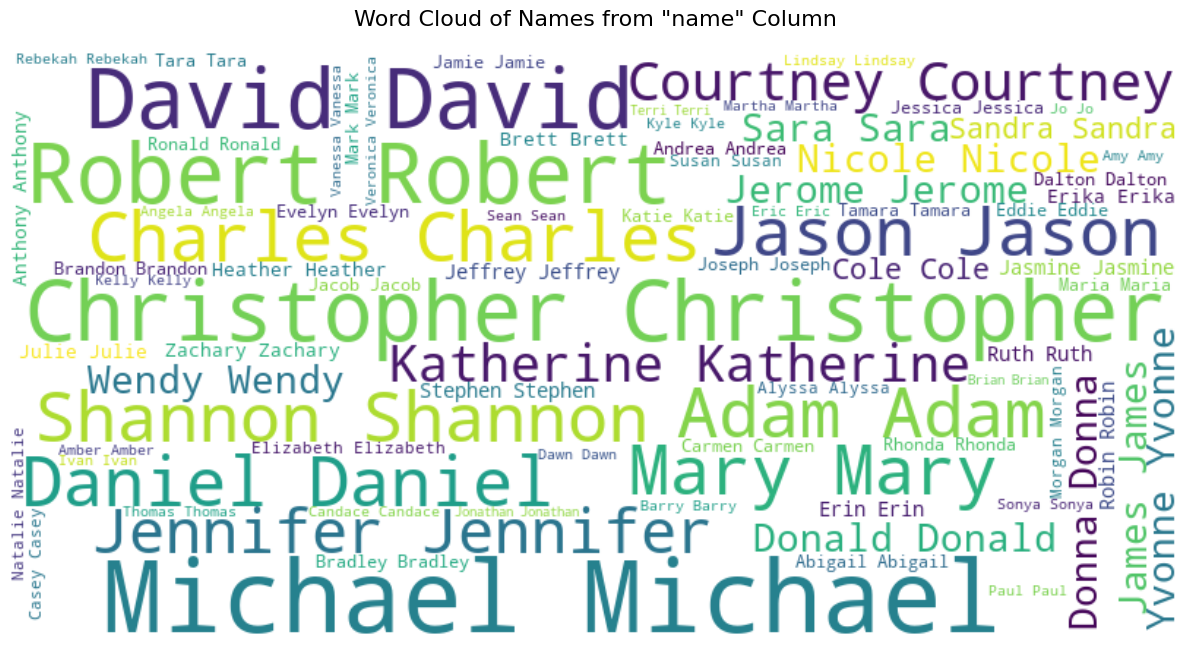

📈 Word cloud saved as 'name_wordcloud.png'

🏆 Top 10 most common names:
  Michael: 90 (1285.7%)
  Christopher: 90 (818.2%)
  David: 90 (1800.0%)
  Robert: 90 (1500.0%)
  Mary: 60 (1500.0%)
  Shannon: 60 (857.1%)
  Charles: 60 (857.1%)
  Daniel: 60 (1000.0%)
  Adam: 60 (1500.0%)
  Jason: 60 (1200.0%)
Using 'temperature_c' for temperature
Using 'oxygen_saturation' for oxygen saturation


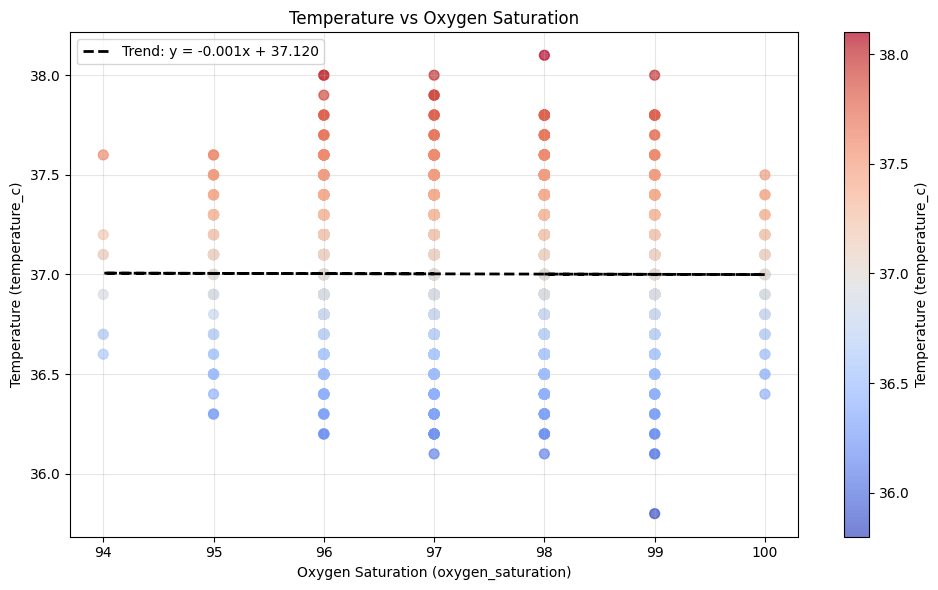

Correlation: -0.004
Sample size: 2993


In [33]:
# PART 3 b
# Plot number of birth_weight_kg over weight_kg
# Check if the required columns exist
required_columns = ['birth_weight_kg', 'weight_kg']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"❌ Missing columns: {missing_columns}")
    print("Available columns:", df.columns.tolist())
else:
    print("✅ Found both birth_weight_kg and weight_kg columns")
    
    # Clean the data - remove missing values and invalid weights
    df_clean = df[required_columns].dropna()
    df_clean = df_clean[(df_clean['birth_weight_kg'] > 0) & (df_clean['weight_kg'] > 0)]
    
    print(f"Original data: {len(df)} rows")
    print(f"Clean data: {len(df_clean)} rows")
    
    if len(df_clean) > 0:
        # Create the plot
        plt.figure(figsize=(12, 8))
        
        # Scatter plot
        plt.subplot(2, 2, 1)
        plt.scatter(df_clean['birth_weight_kg'], df_clean['weight_kg'], alpha=0.6)
        plt.xlabel('Birth Weight (kg)')
        plt.ylabel('Current Weight (kg)')
        plt.title('Birth Weight vs Current Weight')
        plt.grid(True, alpha=0.3)
        
        # Add regression line
        from scipy import stats
        slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean['birth_weight_kg'], df_clean['weight_kg'])
        line_x = np.linspace(df_clean['birth_weight_kg'].min(), df_clean['birth_weight_kg'].max(), 100)
        line_y = slope * line_x + intercept
        plt.plot(line_x, line_y, 'r-', linewidth=2)
        plt.text(0.05, 0.95, f'R² = {r_value**2:.3f}', transform=plt.gca().transAxes, 
                bbox=dict(facecolor='white', alpha=0.8))
        
        # Histogram of birth weights
        plt.subplot(2, 2, 2)
        plt.hist(df_clean['birth_weight_kg'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        plt.xlabel('Birth Weight (kg)')
        plt.ylabel('Frequency')
        plt.title('Distribution of Birth Weights')
        plt.grid(True, alpha=0.3)
        
        # Histogram of current weights
        plt.subplot(2, 2, 3)
        plt.hist(df_clean['weight_kg'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
        plt.xlabel('Current Weight (kg)')
        plt.ylabel('Frequency')
        plt.title('Distribution of Current Weights')
        plt.grid(True, alpha=0.3)
        
        # Box plot
        plt.subplot(2, 2, 4)
        weight_data = [df_clean['birth_weight_kg'], df_clean['weight_kg']]
        plt.boxplot(weight_data, labels=['Birth Weight', 'Current Weight'])
        plt.ylabel('Weight (kg)')
        plt.title('Weight Distribution Comparison')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('birth_weight_vs_current_weight.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Statistical summary
        print("\n📊 STATISTICAL SUMMARY:")
        print("Birth Weight (kg):")
        print(f"  Mean: {df_clean['birth_weight_kg'].mean():.3f}")
        print(f"  Std: {df_clean['birth_weight_kg'].std():.3f}")
        print(f"  Min: {df_clean['birth_weight_kg'].min():.3f}")
        print(f"  Max: {df_clean['birth_weight_kg'].max():.3f}")
        
        print("\nCurrent Weight (kg):")
        print(f"  Mean: {df_clean['weight_kg'].mean():.3f}")
        print(f"  Std: {df_clean['weight_kg'].std():.3f}")
        print(f"  Min: {df_clean['weight_kg'].min():.3f}")
        print(f"  Max: {df_clean['weight_kg'].max():.3f}")
        
        print(f"\nCorrelation: {df_clean['birth_weight_kg'].corr(df_clean['weight_kg']):.3f}")
        
    else:
        print("❌ No valid data points after cleaning")
        
    # Create a bar chart of top gender
gender_column = 'gender'  

if gender_column not in df.columns:
    print(f"❌ Column '{gender_column}' not found. Available columns:")
    print(df.columns.tolist())
else:
    # Count gender distribution
    gender_counts = df[gender_column].value_counts()
    total_count = len(df)
    
    # Create the bar chart
    plt.figure(figsize=(8, 6))
    bars = plt.bar(gender_counts.index, gender_counts.values, 
                color=['lightblue', 'lightpink', 'lightgray'], 
                edgecolor='black', alpha=0.8)
    
    plt.title('Gender Distribution', fontsize=16)
    plt.xlabel('Gender')
    plt.ylabel('Count')
    
    # Add value labels
    for i, count in enumerate(gender_counts.values):
        plt.text(i, count + max(gender_counts.values)*0.01, 
                str(count), ha='center', va='bottom', fontweight='bold')
    
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    
    # Save and show
    plt.savefig('gender_chart.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Gender counts:")
    for gender, count in gender_counts.items():
        print(f"{gender}: {count}")
        
        
    # Generate a word cloud of name
# First, let's find potential name columns
potential_name_cols = ['name']

name_column = None
for col in potential_name_cols:
    if col in df.columns:
        name_column = col
        break

if name_column is None:
    print("❌ No name column found. Available columns:")
    print(df.columns.tolist())
else:
    print(f"✅ Using name column: '{name_column}'")
    
    # Extract and clean names
    name = df[name_column].dropna().astype(str).str.strip()
    
    if len(name) == 0:
        print("❌ No names found in the column")
    else:
        print(f"Found {len(name)} names")
        
        # Combine all names into a single string
        all_names = ' '.join(name)
        
        # Generate word cloud
        wordcloud = WordCloud(
            width=800, 
            height=400, 
            background_color='white',
            colormap='viridis',
            max_words=100,
            contour_width=3,
            contour_color='steelblue'
        ).generate(all_names)
        
        # Display the word cloud
        plt.figure(figsize=(12, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud of Names from "{name_column}" Column', fontsize=16, pad=20)
        plt.tight_layout()
        
        # Save the word cloud
        plt.savefig('name_wordcloud.png', dpi=300, bbox_inches='tight', facecolor='white')
        plt.show()
        
        print("📈 Word cloud saved as 'name_wordcloud.png'")
        
        # Show most common names
        name_counts = Counter(name)
        print(f"\n🏆 Top 10 most common names:")
        for name, count in name_counts.most_common(10):
            percentage = (count / len(name)) * 100
            print(f"  {name}: {count} ({percentage:.1f}%)")
            
    # Plot distribution of temperature_c by oxygen_saturation
    # Check for alternative column names
temp_cols = ['temperature_c']
o2_cols = ['oxygen_saturation']

temp_column = None
o2_column = None

for col in temp_cols:
    if col in df.columns:
        temp_column = col
        break

for col in o2_cols:
    if col in df.columns:
        o2_column = col
        break

if temp_column and o2_column:
    print(f"Using '{temp_column}' for temperature")
    print(f"Using '{o2_column}' for oxygen saturation")
    
    # Clean data
    df_clean = df[[temp_column, o2_column]].dropna()
    df_clean = df_clean[
        (df_clean[temp_column] >= 30) & (df_clean[temp_column] <= 45) &
        (df_clean[o2_column] >= 70) & (df_clean[o2_column] <= 100)
    ]
    
    if len(df_clean) > 0:
        # Create scatter plot
        plt.figure(figsize=(10, 6))
        
        # Color points by temperature
        scatter = plt.scatter(df_clean[o2_column], df_clean[temp_column], 
                            c=df_clean[temp_column], cmap='coolwarm', 
                            alpha=0.7, s=50)
        
        plt.xlabel(f'Oxygen Saturation ({o2_column})')
        plt.ylabel(f'Temperature ({temp_column})')
        plt.title('Temperature vs Oxygen Saturation')
        plt.colorbar(label=f'Temperature ({temp_column})')
        plt.grid(True, alpha=0.3)
        
        # Add trend line
        z = np.polyfit(df_clean[o2_column], df_clean[temp_column], 1)
        p = np.poly1d(z)
        plt.plot(df_clean[o2_column], p(df_clean[o2_column]), "k--", linewidth=2,
                label=f'Trend: y = {z[0]:.3f}x + {z[1]:.3f}')
        
        plt.legend()
        plt.tight_layout()
        plt.savefig('temp_vs_o2.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Calculate correlation
        correlation = df_clean[o2_column].corr(df_clean[temp_column])
        print(f"Correlation: {correlation:.3f}")
        print(f"Sample size: {len(df_clean)}")
        
    else:
        print("No valid data after cleaning")
else:
    print("Could not find required columns. Available columns:")
    print(df.columns.tolist())